In [77]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import nltk
import numpy as np
from sklearn.utils import shuffle

from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [56]:
# load the reviews
# data courtesy of http://www.cs.jhu.edu/~mdredze/datasets/sentiment/index2.html
positive_reviews = BeautifulSoup(open('electronics/positive.review').read(), features="html5lib")
positive_reviews = positive_reviews.findAll('review_text')

negative_reviews = BeautifulSoup(open('electronics/negative.review').read(), features="html5lib")
negative_reviews = negative_reviews.findAll('review_text')

In [59]:
print(type(positive_reviews))
print(len(positive_reviews))
print(len(negative_reviews))

<class 'bs4.element.ResultSet'>
1000
1000


In [210]:
# POS tagging test
s = "Alex Dou is the most awesome guy on earth."
tags = nltk.pos_tag(s.split()) # tags of part of speech
chunk = nltk.ne_chunk(tags) # name identity identification
chunk.draw()

In [204]:
# lemmatization test
wordnet_lemmatizer = WordNetLemmatizer()
wordnet_lemmatizer.lemmatize("wolves")

'splenmdi'

In [188]:
# Preprocess Pipeline

# Eample pipeline:
    ## 1. Lower Case
    ## 2. Tokenize (NLTK -> tokenize.word_tokenize)
    ## 3. Remove short tokens: tokens = [t for t in tokens if len(t) > 2]
    ## 4. Lemmatizeation: [wordnet_lemmatizer.lemmatize(t) for t in token]
    ## 5. Remove stop words: [t for t in tokens if t not in stopwords]
## Some Tips
## NLTK -> tokenize.word_tokenize
    # Custom tokenizer (or extra step to process tokens after) -> e.g. remove stopwords, remove numbers / single-letter tokens
        # For logistic regress, normalize the input so that it won't fall into 10-100 (sigmod ~0)

wordnet_lemmatizer = WordNetLemmatizer()

# stopwords
from nltk.corpus import stopwords
from nltk import ngrams
stopwords = stopwords.words('english')

# Add additional stopwords:
add_stopwords = ['ha','wa','even','one','doe']
stopwords = stopwords + add_stopwords

def concate_ngrams(ng):
    ng_out = []
    for g in list(ng):
        g_out = ''
        for word in g:
            if g_out == '':
                g_out += word
            else:
                g_out += '_' + word            
        ng_out.append(g_out)   
    return ng_out
        
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if t.isalnum()] # remove all punctuations
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    bigrams = ngrams(tokens,2)
    return concate_ngrams(bigrams)

test = "This is a test string created by Alex Dou. He is awesome. Doesn't great?"
print(my_tokenizer(test))

['test_string', 'string_created', 'created_alex', 'alex_dou', 'dou_awesome', "awesome_n't", "n't_great"]


In [189]:
# Create BOW
def bow_creator(corpus):
    wordfreq = {}
    tokenized_reviews = []
    for review in corpus:
        tokens = my_tokenizer(review.text)
        tokenized_reviews.append(tokens)
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
    wordfreq = {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1], reverse=True) } # sort by # of words            
    return wordfreq, tokenized_reviews

wordfreq_positive, tokenized_positive_reviews = bow_creator(positive_reviews)
wordfreq_negative, tokenized_negative_reviews = bow_creator(negative_reviews)

In [190]:
# print first 5 key words
print(list(wordfreq_positive.items())[0:10])
print(list(wordfreq_negative.items())[0:10])

[('sound_quality', 70), ('work_well', 57), ('easy_use', 45), ('work_great', 43), ('highly_recommend', 42), ('mp3_player', 40), ('much_better', 35), ('dvd_player', 34), ('battery_life', 27), ("n't_use", 24)]
[("n't_work", 73), ('customer_service', 56), ('sound_quality', 54), ("would_n't", 46), ('tech_support', 43), ("could_n't", 43), ('waste_money', 42), ("n't_get", 35), ("n't_buy", 33), ("n't_know", 33)]


In [167]:
def word_cloud_viz(wordfreq):
    wordcloud = WordCloud(width=1000, height=750).generate_from_frequencies(wordfreq)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

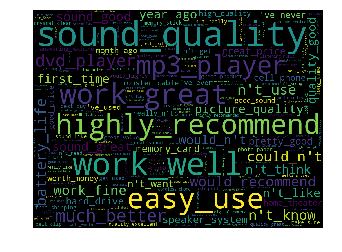

In [191]:
word_cloud_viz(wordfreq_positive)

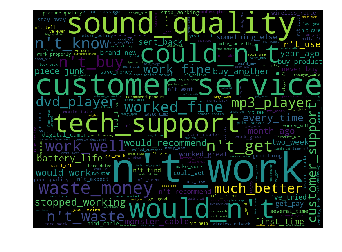

In [192]:
word_cloud_viz(wordfreq_negative)